In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [24]:
data = pd.read_csv("D:\Datasets\IRIS (1).csv")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
data["species"] = data["species"].astype('category')
data.dtypes
data["species"]= data["species"].cat.codes
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
data=data.iloc[:,[4,1]]
data.head(2)

,species,sepal_width
0,0,3.5
1,0,3.0


In [27]:
X = data.values

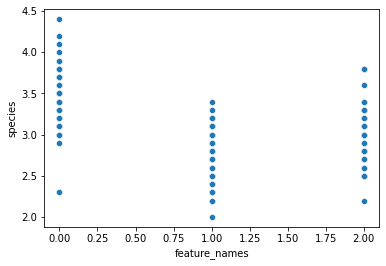

In [28]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('feature_names')
plt.ylabel('species')
plt.show()

In [29]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +
        (centroids[int(cluster[i]), 1]-val[1])**2)
    return sum

In [30]:
def kmeans(X,k):
    diff=1
    cluster=np.zeros(X.shape[0])
    centroids=data.sample(n=k).values
    while diff:
        for i, row in enumerate(X):
            mn_dist = float('inf')
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-
row[1])**2)
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids =pd.DataFrame(X).groupby(by=cluster).mean().values
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
        return centroids, cluster

In [32]:
k=3
centroids,cluster=kmeans(X,k)

Text(0, 0.5, 'species')

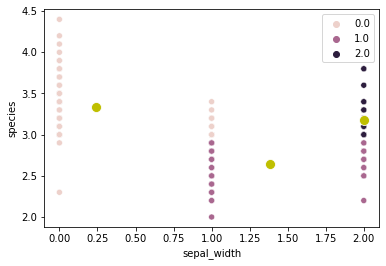

In [33]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('sepal_width')
plt.ylabel('species')